In [2]:
#Assignment 3
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Load dataset
df = pd.read_csv(r"D:\SBUP\Notes\ML LAB TYBCA B\Dataset\Mall_Customers.csv")

In [4]:
# Display first few rows
print("First 5 rows of dataset:")
df.head()First 5 rows of dataset:


First 5 rows of dataset:


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
# Dataset info
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Drop ID column if present
df = df.drop('CustomerID', axis = 1)

In [8]:
# Describe data
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


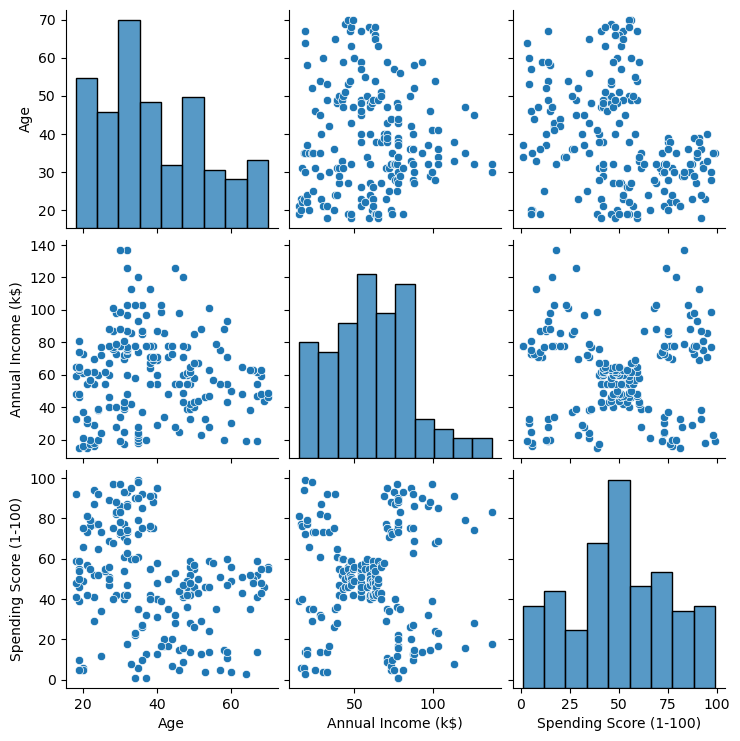

In [9]:

# Visualize pairplot (if data not too large)
sns.pairplot(df)
plt.show()

In [10]:
# Encode the Gender column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [11]:
df

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
..      ...  ...                 ...                     ...
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]

In [12]:
# Assuming numerical columns for clustering
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[num_cols]

In [13]:
num_cols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [14]:
X

Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]

In [15]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\debasmita.datta\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
# Show cluster centers
print("\nCluster Centers (scaled):")
print(kmeans.cluster_centers_)


Cluster Centers (scaled):
[[ 0.82935381 -0.00348296 -0.65438593]
 [-0.43033758  1.02223317  1.15593564]
 [-0.98371627 -0.65995549  0.24488394]]


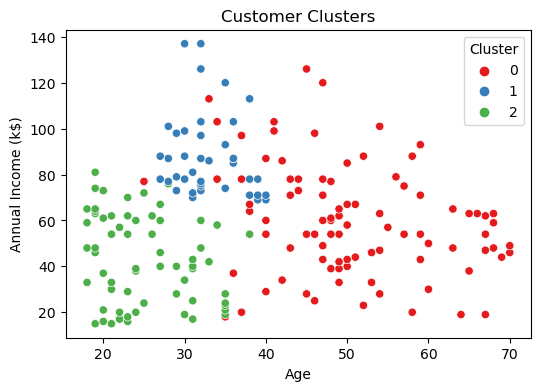

In [21]:
# Visualize clusters (first two features)
plt.figure(figsize=(6,4))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=df['Cluster'], palette='Set1')
plt.title('Customer Clusters')
plt.show()

In [27]:
# Elbow method to find optimal k
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\debasmita.datta\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\debasmita.datta\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\debasmita.datta\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\debasmita.datta\AppData\Roaming\Python\P

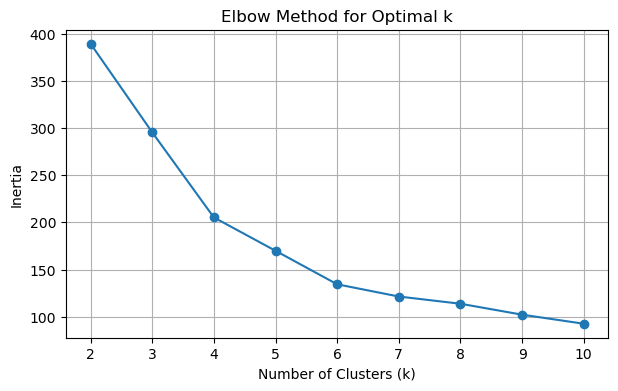

In [20]:
plt.figure(figsize=(7, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [21]:
# Apply final KMeans (set n_clusters based on Elbow method insight)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\debasmita.datta\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
# Show cluster centers
print("\nCluster Centers (scaled):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=num_cols))


Cluster Centers (scaled):
        Age  Annual Income (k$)  Spending Score (1-100)
0  1.086161           -0.490565               -0.397174
1 -0.428806            0.974847                1.216085
2 -0.962492           -0.784763                0.392030
3  0.037205            0.990115               -1.188757


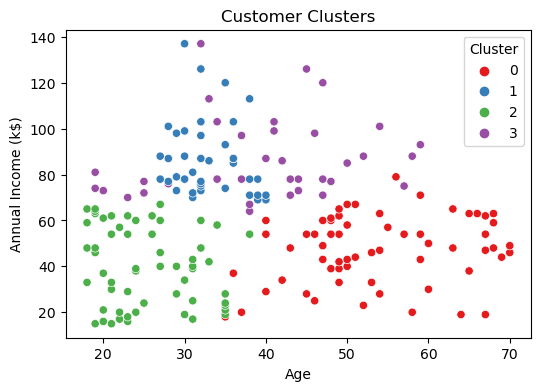

In [23]:
# Visualize clusters (based on first 2 numerical features)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[num_cols[0]], y=X[num_cols[1]], hue=df['Cluster'], palette='Set1')
plt.title('Customer Clusters')
plt.xlabel(num_cols[0])
plt.ylabel(num_cols[1])
plt.legend(title='Cluster')
plt.show()